In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def print_percentiles(c, name):
    if c == 0:
        return null
    else:
        print('-----------------------------\n')
        print('percentile values distribution for %s\n' % name)

        print('20th Percentile:%f\n' % c.Percentile(20))    
        print('25th Percentile:%f\n' % c.Percentile(25))
        print('40th Percentile:%f\n' % c.Percentile(40))
        print('50th Percentile:%f\n' % c.Percentile(50))
        print('60th Percentile:%f\n' % c.Percentile(60))
        print('75th Percentile:%f\n' % c.Percentile(75))
        print('80th Percentile:%f\n' % c.Percentile(80))    
        print('90th Percentile:%f\n' % c.Percentile(90))
        print('99th Percentile:%f\n' % c.Percentile(99))

        print('-----------------------------\n')

In [3]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [4]:
%autosave 20

Autosaving every 20 seconds


In [5]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
tcp_tls_data = "./AWS_results/N.California/data/output_curl_data.csv"
quic_data = "./AWS_results/N.California/data/output_quic.csv"

In [8]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']

In [9]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)

In [10]:
t = t.dropna()
s = s.dropna()

In [11]:
#t = t[t['TimeOfMeasurement'] > 1581721201]
#s = s[s['TimeOfMeasurement'] > 1581721201]

In [12]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [13]:
s.count()

TimeOfMeasurement              333677
Url                            333677
Ip                             333677
Port                           333677
DnsLookupTime                  333677
TCPHandshakeTime               333677
ConnectionEstablishmentTime    333677
TTFB                           333677
TotalDownloadTime              333677
HttpResponse                   333677
HTTPVersion                    333677
Protocol                       333677
dtype: int64

In [14]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1589644802,www.google.com,216.58.194.164,443,5.983,2.320,161.516,215.911,226.943,200,HTTP/1.1,TCP/TLS1.2
1,1589644802,www.google.com,216.58.194.164,443,12.719,5.758,155.791,216.441,235.016,200,HTTP2,TCP/TLS1.2
2,1589644802,facebook.com,157.240.3.35,443,17.493,20.638,149.535,223.139,223.167,301,HTTP/1.1,TCP/TLS1.2
3,1589644803,facebook.com,157.240.3.35,443,5.989,21.795,121.031,196.358,196.385,301,HTTP/1.1,TCP/TLS1.3
4,1589644803,facebook.com,157.240.3.35,443,12.658,22.437,144.358,227.093,227.124,301,HTTP2,TCP/TLS1.2


In [15]:
t.count()

TimeOfMeasurement              739149
Url                            739149
Path                           739149
Ip                             739149
Port                           739149
DNSTime                        739149
ConnectionEstablishmentTime    739149
TTFB                           739149
TotalDownloadTime              739149
HttpResponse                   739149
Protocol                       739149
dtype: int64

In [16]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,26.789,44.031,191.520,252.621,404.0,Q043
1,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,0.833,43.702,198.238,216.891,404.0,Q046
2,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,10.528,44.412,313.128,333.717,404.0,Q050
8,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,18.358,48.302,208.418,234.287,404.0,Q043
9,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,0.970,44.219,305.459,333.191,404.0,Q046


In [17]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [18]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [19]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,5.983,2.320,161.516,215.911,226.943,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,12.719,5.758,155.791,216.441,235.016,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.3.35,443,17.493,20.638,149.535,223.139,223.167,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,5.989,21.795,121.031,196.358,196.385,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,12.658,22.437,144.358,227.093,227.124,301,HTTP2,TCP/TLS1.2


In [20]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
333672,Wed May 20 17:31:21 2020,webptt.com,104.31.70.119,443,84.486,2.132,11982.722,12351.641,12639.428,200,HTTP2,TCP/TLS1.2
333673,Wed May 20 17:31:32 2020,easyview.eu,54.38.72.112,443,161.576,162.524,19888.199,20054.352,20216.558,200,HTTP/1.1,TCP/TLS1.2
333674,Wed May 20 17:31:39 2020,agones.gr,104.27.201.90,443,120.879,40.362,13762.554,14129.757,14331.592,200,HTTP/1.1,TCP/TLS1.2
333675,Wed May 20 17:31:53 2020,rapidvideo.com,34.235.250.63,443,118.807,84.626,15101.080,15182.109,15182.155,302,HTTP/1.1,TCP/TLS1.2
333676,Wed May 20 17:31:54 2020,siteorigin.com,104.26.5.59,443,120.462,1.774,13752.344,14203.193,14205.093,200,HTTP/1.1,TCP/TLS1.2


In [21]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [22]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,26.789,44.031,191.520,252.621,404.0,Q043
1,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,0.833,43.702,198.238,216.891,404.0,Q046
2,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,10.528,44.412,313.128,333.717,404.0,Q050
8,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,18.358,48.302,208.418,234.287,404.0,Q043
9,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,0.970,44.219,305.459,333.191,404.0,Q046


In [23]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2097654,1.589989e+09,www.mrshehab-tito.blogspot.com,/,172.217.6.65,443,43.891,964.368,84.578,84.640,301.0,Q050
2097655,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,81.890,78.490,199.985,200.044,301.0,Q043
2097657,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,37.531,80.943,165.138,201.929,301.0,Q046
2097658,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,39.949,125.540,206.616,206.676,301.0,Q050
2097670,1.589989e+09,www.jhrogue.blogspot.com,/,172.217.6.65,443,123.839,162.903,323.018,323.083,301.0,Q043


In [24]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [25]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [26]:
quic4.count()

TimeOfMeasurement              739149
Url                            739149
Path                           739149
Ip                             739149
Port                           739149
DNSTime                        739149
ConnectionEstablishmentTime    739149
TTFB                           739149
TotalDownloadTime              739149
HttpResponse                   739149
Protocol                       739149
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,26.789,44.031,191.520,252.621,404.0,Q043
1,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,0.833,43.702,198.238,216.891,404.0,Q046
2,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,10.528,44.412,313.128,333.717,404.0,Q050
8,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,18.358,48.302,208.418,234.287,404.0,Q043
9,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,0.970,44.219,305.459,333.191,404.0,Q046


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [30]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [31]:
tcp4.count()

TimeOfMeasurement              333677
Url                            333677
Ip                             333677
Port                           333677
DnsLookupTime                  333677
TCPHandshakeTime               333677
ConnectionEstablishmentTime    333677
TTFB                           333677
TotalDownloadTime              333677
HttpResponse                   333677
HTTPVersion                    333677
Protocol                       333677
dtype: int64

In [32]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,5.983,2.320,161.516,215.911,226.943,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,12.719,5.758,155.791,216.441,235.016,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.3.35,443,17.493,20.638,149.535,223.139,223.167,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,5.989,21.795,121.031,196.358,196.385,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,12.658,22.437,144.358,227.093,227.124,301,HTTP2,TCP/TLS1.2


In [33]:
tcp6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [34]:
tcp6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [35]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicID24 = quic4.loc[t['Protocol'] == 'FF000018']
quic98 = quic4.loc[t['Protocol'] == '']

In [36]:
quic43.count()

TimeOfMeasurement              247897
Url                            247897
Path                           247897
Ip                             247897
Port                           247897
DNSTime                        247897
ConnectionEstablishmentTime    247897
TTFB                           247897
TotalDownloadTime              247897
HttpResponse                   247897
Protocol                       247897
dtype: int64

In [37]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,26.789,44.031,191.520,252.621,404.0,Q043
8,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,18.358,48.302,208.418,234.287,404.0,Q043
16,1.589580e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.5.97,443,26.432,47.355,225.455,225.514,301.0,Q043
24,1.589580e+09,www.100negocios.com,/,66.198.240.11,443,129.079,123.054,670.904,806.319,200.0,Q043
40,1.589580e+09,www.1100021.blogspot.com,/,172.217.5.97,443,24.731,43.050,157.375,157.432,301.0,Q043


In [38]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2097634,1.589989e+09,www.mrshehab-tito.blogspot.com,/,172.217.6.65,443,39.564,81.161,328.117,328.176,301.0,Q043
2097638,1.589989e+09,www.winetricks.googlecode.com,/,74.125.137.82,443,711.013,80.984,121.423,121.487,404.0,Q043
2097642,1.589989e+09,www.foobar.withgoogle.com,/,172.217.5.113,443,79.503,81.232,161.958,162.021,200.0,Q043
2097655,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,81.890,78.490,199.985,200.044,301.0,Q043
2097670,1.589989e+09,www.jhrogue.blogspot.com,/,172.217.6.65,443,123.839,162.903,323.018,323.083,301.0,Q043


In [39]:
quic46.count()

TimeOfMeasurement              245193
Url                            245193
Path                           245193
Ip                             245193
Port                           245193
DNSTime                        245193
ConnectionEstablishmentTime    245193
TTFB                           245193
TotalDownloadTime              245193
HttpResponse                   245193
Protocol                       245193
dtype: int64

In [40]:
quic46.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,0.833,43.702,198.238,216.891,404.0,Q046
9,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,0.970,44.219,305.459,333.191,404.0,Q046
17,1.589580e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.5.97,443,0.709,43.849,199.247,199.326,301.0,Q046
25,1.589580e+09,www.100negocios.com,/,66.198.240.11,443,0.700,118.499,651.876,790.427,200.0,Q046
41,1.589580e+09,www.1100021.blogspot.com,/,172.217.5.97,443,0.819,42.533,140.312,140.388,301.0,Q046


In [41]:
quic46.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2097625,1.589989e+09,www.jhchung0.blogspot.com,/,172.217.6.65,443,37.359,85.023,206.563,206.624,301.0,Q046
2097636,1.589989e+09,www.mrshehab-tito.blogspot.com,/,172.217.6.65,443,40.902,120.456,208.450,208.502,301.0,Q046
2097639,1.589989e+09,www.winetricks.googlecode.com,/,74.125.137.82,443,2.132,78.123,118.588,118.648,404.0,Q046
2097645,1.589989e+09,www.foobar.withgoogle.com,/,172.217.5.113,443,39.899,83.164,245.206,245.270,200.0,Q046
2097657,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,37.531,80.943,165.138,201.929,301.0,Q046


In [42]:
quic50.count()

TimeOfMeasurement              242532
Url                            242532
Path                           242532
Ip                             242532
Port                           242532
DNSTime                        242532
ConnectionEstablishmentTime    242532
TTFB                           242532
TotalDownloadTime              242532
HttpResponse                   242532
Protocol                       242532
dtype: int64

In [43]:
quic50.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,1.589580e+09,www.0dayrox2.blogspot.com,/,172.217.5.97,443,10.528,44.412,313.128,333.717,404.0,Q050
10,1.589580e+09,www.0dayrox.blogspot.com,/,172.217.5.97,443,27.994,43.858,202.719,280.798,404.0,Q050
18,1.589580e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.5.97,443,0.848,42.363,298.533,298.594,301.0,Q050
26,1.589580e+09,www.100negocios.com,/,66.198.240.11,443,0.754,118.943,664.085,807.167,200.0,Q050
42,1.589580e+09,www.1100021.blogspot.com,/,172.217.5.97,443,0.684,43.279,141.129,141.188,301.0,Q050


In [44]:
quic50.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2097643,1.589989e+09,www.sostenibilidad.com,/,192.229.211.16,443,7.137,592.857,245.983,375.113,200.0,Q050
2097646,1.589989e+09,www.foobar.withgoogle.com,/,172.217.5.113,443,2.459,119.026,203.906,203.972,200.0,Q050
2097650,1.589989e+09,www.winetricks.googlecode.com,/,74.125.137.82,443,638.883,161.600,202.099,202.160,404.0,Q050
2097654,1.589989e+09,www.mrshehab-tito.blogspot.com,/,172.217.6.65,443,43.891,964.368,84.578,84.640,301.0,Q050
2097658,1.589989e+09,www.sotakhandmade.blogspot.com,/,172.217.6.65,443,39.949,125.540,206.616,206.676,301.0,Q050


In [45]:
quicID24.count()

TimeOfMeasurement              3527
Url                            3527
Path                           3527
Ip                             3527
Port                           3527
DNSTime                        3527
ConnectionEstablishmentTime    3527
TTFB                           3527
TotalDownloadTime              3527
HttpResponse                   3527
Protocol                       3527
dtype: int64

In [46]:
quicID24.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
555,1.589580e+09,www.9999999views.com,/,178.32.108.178,443,0.625,145.664,289.043,289.121,301.0,FF000018
1250,1.589581e+09,www.akaian.com,/,150.95.55.38,443,0.772,215.351,321.896,321.967,301.0,FF000018
1518,1.589581e+09,www.allzine.org,/,194.150.248.139,443,0.687,185.364,373.387,373.438,200.0,FF000018
1598,1.589581e+09,www.altoonaworks.info,/,72.249.49.192,443,0.821,89.615,134.116,136.782,200.0,FF000018
3130,1.589581e+09,www.av-baron.com,/,150.95.52.123,443,0.676,217.363,410.334,410.425,301.0,FF000018


In [47]:
quicID24.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2094183,1.589988e+09,www.farangshop.co.uk,/,89.145.92.12,443,79.101,368.998,696.655,696.719,303.0,FF000018
2094491,1.589988e+09,www.irishtune.info,/,72.249.49.192,443,224.861,45.457,123.818,123.981,200.0,FF000018
2095708,1.589988e+09,www.filmtett.ro,/,176.126.202.142,443,54.564,325.595,498.355,752.088,200.0,FF000018
2095730,1.589988e+09,www.bold.expert,/,194.150.248.168,443,37.788,174.553,343.021,343.061,301.0,FF000018
2096079,1.589988e+09,www.jalopyjournal.com,/,158.106.189.183,443,39.994,830.939,281.475,362.447,200.0,FF000018


In [48]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
#quic98_6 = quic6.loc[t['Protocol'] == '']
quicID24_6 = quic6.loc[t['Protocol'] == 'FF000018'] 

In [49]:
quic43_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [50]:
quic43_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [51]:
quic43_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [52]:
quic46_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [53]:
quic46_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [54]:
quic46_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [55]:
quic50_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [56]:
quic50_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [57]:
quic50_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [58]:
quicID24_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [59]:
quicID24_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [60]:
quicID24_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [61]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [62]:
tcp12.count()

TimeOfMeasurement              332700
Url                            332700
Ip                             332700
Port                           332700
DnsLookupTime                  332700
TCPHandshakeTime               332700
ConnectionEstablishmentTime    332700
TTFB                           332700
TotalDownloadTime              332700
HttpResponse                   332700
HTTPVersion                    332700
Protocol                       332700
dtype: int64

In [63]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,5.983,2.320,161.516,215.911,226.943,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,216.58.194.164,443,12.719,5.758,155.791,216.441,235.016,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.3.35,443,17.493,20.638,149.535,223.139,223.167,301,HTTP/1.1,TCP/TLS1.2
4,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,12.658,22.437,144.358,227.093,227.124,301,HTTP2,TCP/TLS1.2
6,Sat May 16 18:00:04 2020,instagram.com,34.199.183.65,443,5.173,61.479,264.150,414.323,414.368,301,HTTP/1.1,TCP/TLS1.2


In [64]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
333672,Wed May 20 17:31:21 2020,webptt.com,104.31.70.119,443,84.486,2.132,11982.722,12351.641,12639.428,200,HTTP2,TCP/TLS1.2
333673,Wed May 20 17:31:32 2020,easyview.eu,54.38.72.112,443,161.576,162.524,19888.199,20054.352,20216.558,200,HTTP/1.1,TCP/TLS1.2
333674,Wed May 20 17:31:39 2020,agones.gr,104.27.201.90,443,120.879,40.362,13762.554,14129.757,14331.592,200,HTTP/1.1,TCP/TLS1.2
333675,Wed May 20 17:31:53 2020,rapidvideo.com,34.235.250.63,443,118.807,84.626,15101.080,15182.109,15182.155,302,HTTP/1.1,TCP/TLS1.2
333676,Wed May 20 17:31:54 2020,siteorigin.com,104.26.5.59,443,120.462,1.774,13752.344,14203.193,14205.093,200,HTTP/1.1,TCP/TLS1.2


In [65]:
tcp13.count()

TimeOfMeasurement              977
Url                            977
Ip                             977
Port                           977
DnsLookupTime                  977
TCPHandshakeTime               977
ConnectionEstablishmentTime    977
TTFB                           977
TotalDownloadTime              977
HttpResponse                   977
HTTPVersion                    977
Protocol                       977
dtype: int64

In [66]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
3,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,5.989,21.795,121.031,196.358,196.385,301,HTTP/1.1,TCP/TLS1.3
5,Sat May 16 18:00:03 2020,facebook.com,157.240.3.35,443,12.478,21.692,121.759,195.096,195.127,301,HTTP2,TCP/TLS1.3
7,Sat May 16 18:00:04 2020,instagram.com,34.197.183.108,443,12.777,65.604,208.471,345.289,345.336,301,HTTP/1.1,TCP/TLS1.3
9,Sat May 16 18:00:05 2020,instagram.com,34.192.95.2,443,10.061,62.057,186.797,300.402,300.437,301,HTTP2,TCP/TLS1.3
11,Sat May 16 18:00:05 2020,www.whatsapp.com,157.240.3.54,443,18.520,20.249,133.371,219.775,219.806,302,HTTP/1.1,TCP/TLS1.3


In [67]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
332597,Wed May 20 16:19:48 2020,fb.com,157.240.3.35,443,2699.058,40.443,18297.558,18377.119,18377.150,302,HTTP2,TCP/TLS1.3
332623,Wed May 20 16:22:31 2020,messenger.com,157.240.3.20,443,80.420,40.590,15792.550,15876.261,15876.288,301,HTTP/1.1,TCP/TLS1.3
332627,Wed May 20 16:23:11 2020,messenger.com,157.240.3.20,443,2744.280,40.586,17577.751,17663.182,17663.211,301,HTTP2,TCP/TLS1.3
333089,Wed May 20 16:53:55 2020,fbsbx.com,157.240.3.35,443,120.267,40.478,21118.579,21238.023,21238.051,302,HTTP/1.1,TCP/TLS1.3
333094,Wed May 20 16:54:32 2020,fbsbx.com,157.240.3.35,443,39.554,40.272,18748.159,18868.217,18868.263,302,HTTP2,TCP/TLS1.3


In [68]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [69]:
tcp12_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [70]:
tcp12_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [71]:
tcp12_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [72]:
tcp13_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [73]:
tcp13_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [74]:
tcp13_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [75]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['ConnectionEstablishmentTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [76]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETF h3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:42.438000

25th Percentile:42.835000

40th Percentile:78.217000

50th Percentile:79.493000

60th Percentile:80.670000

75th Percentile:83.358000

80th Percentile:85.124000

90th Percentile:286.803000

99th Percentile:733.971000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:55.794000

25th Percentile:64.892000

40th Percentile:167.340000

50th Percentile:1525.993000

60th Percentile:5520.474000

75th Percentile:9056.842000

80th Percentile:10280.931000

90th Percentile:12837.291000

99th Percentile:18059.642000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:42.409000

25th Percentile:42.808000

40th Percentile:78.247000

50th Percentile:79.529000

60th Percentile:80.718000

75th Percentile:83.566000

80th Percentile:85.364000

90th Percentile:307.343000



findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


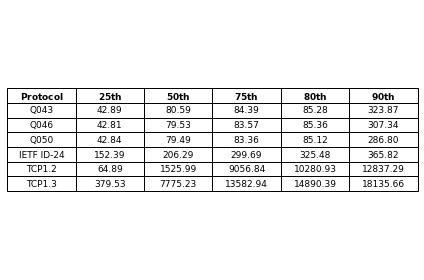

In [77]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/N.California/handshake_times_ipv4_percentile.png', format='png', bbox_inches='tight')


In [78]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24', x6)
write_percentiles('Q043.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


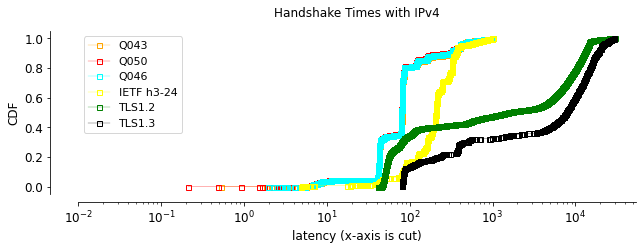

In [79]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color='yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01, 54000])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'16th May - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [80]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic50['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic46['TTFB'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TTFB'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [81]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [82]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:122.914000

25th Percentile:140.325000

40th Percentile:166.020000

50th Percentile:200.651000

60th Percentile:206.492000

75th Percentile:247.494000

80th Percentile:287.117000

90th Percentile:490.307000

99th Percentile:898.244000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:286.455000

25th Percentile:392.252000

40th Percentile:829.195000

50th Percentile:2100.415000

60th Percentile:5931.244000

75th Percentile:9469.089000

80th Percentile:10711.256000

90th Percentile:13257.333000

99th Percentile:18786.857000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:123.408000

25th Percentile:141.764000

40th Percentile:166.301000

50th Percentile:201.033000

60th Percentile:206.703000

75th Percentile:256.228000

80th Percentile:288.229000

90th Percent

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


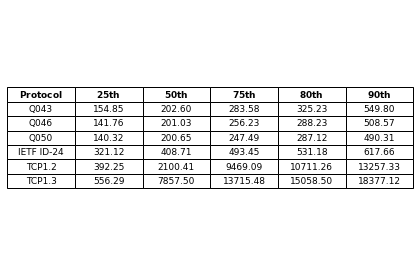

In [83]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/N.California/TTFB_ipv4_percentile.png', format='png', bbox_inches='tight')

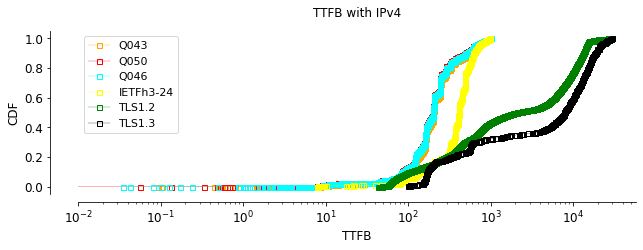

In [84]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETFh3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [85]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TotalDownloadTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [86]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [87]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:125.038000

25th Percentile:145.748000

40th Percentile:169.269000

50th Percentile:202.198000

60th Percentile:223.506000

75th Percentile:286.289000

80th Percentile:327.608000

90th Percentile:536.547000

99th Percentile:917.451000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:306.333000

25th Percentile:409.100000

40th Percentile:892.177000

50th Percentile:2213.797000

60th Percentile:5976.463000

75th Percentile:9533.508000

80th Percentile:10774.073000

90th Percentile:13329.776000

99th Percentile:18987.983000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:125.355000

25th Percentile:146.654000

40th Percentile:171.084000

50th Percentile:202.417000

60th Percentile:232.378000

75th Percentile:287.397000

80th Percentile:328.253000

90th Percent

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


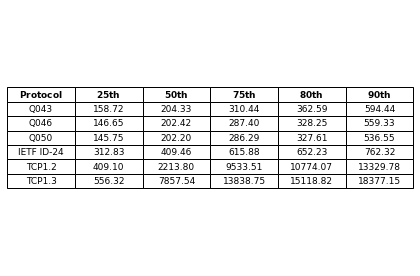

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/N.California/TotalDownloadTime_ipv4_percentile.png', format='png', bbox_inches='tight')

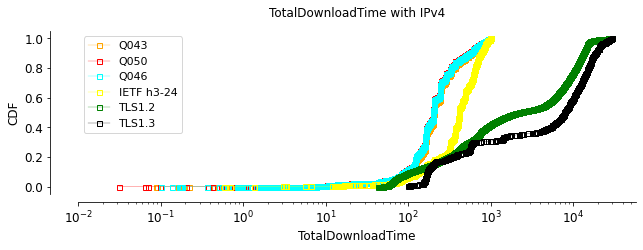

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')